Small world revised

In [2]:
import matplotlib
from pylab import *
import networkx as nx
import random as rd
import math

n = 30 # number of nodes
k = 4 # number of neighbors of each node

def initialize():
    global g
    g = nx.Graph()
    #grid is 5x6
    I = int(n**(1/2))
    J = math.ceil(n/I)
    for i in range(I):
        for j in range(J):
            num = i*J+j+1
            if i>0:
                north = (i-1)*J+j+1
                g.add_edge(num,north)
            if j>0:
                west = i*J+j
                g.add_edge(num,west)
            if i<I-1:
                south = (i+1)*J+j+1
                g.add_edge(num,south)
            if j<J-1:
                east = i*J+j+2
                g.add_edge(num,east)
    g.pos = nx.spring_layout(g)
    g.count = 0

def observe():
    global g
    cla()
    nx.draw(g, pos = g.pos)

def update():
    global g
    g.count += 1
    if g.count % 20 == 0: # rewiring once in every 20 steps
        nds = list(g.nodes)
        i = rd.choice(nds)
        if g.degree[i] > 0:
            g.remove_edge(i, rd.choice(list(g.neighbors(i))))
            nds.remove(i)
            for j in g.neighbors(i):
                nds.remove(j)
            g.add_edge(i, rd.choice(nds))

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)

In [3]:
def initialize():
    global g
    g = nx.complete_graph(m0)
    g.pos = nx.spring_layout(g)
    g.count = 0

def observe():
    global g
    #cla()
    nx.draw(g, pos = g.pos)
    plt.show()
    
def pref_select(nds):
    global g
    r = uniform(0, sum(g.degree(i) for i in nds))
    x=0
    for i in nds:
        x += g.degree[i]
        if r <= x:
            return i

def update(m):
    global g
    g.count += 1
    if g.count % 20 == 0: # network growth once in every 20 steps
        nds = list(g.nodes)
        newcomer = max(nds) + 1
        for i in range(m):
            j = pref_select(nds)
            g.add_edge(newcomer, j)
            nds.remove(j)
        g.pos[newcomer] = (0, 0)

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)

In [4]:
def run_barabasi(m):
    initialize()
    for i in range(100):
        update(m)
        if i % 20 == 0: #Visualizing network every 20 timesteps
            observe()

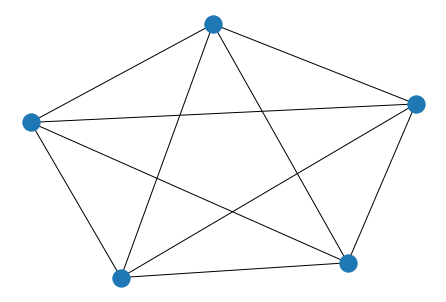

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  from ipykernel import kernelapp as app


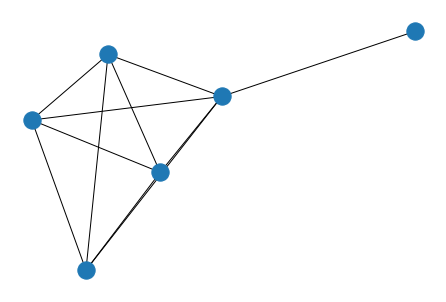

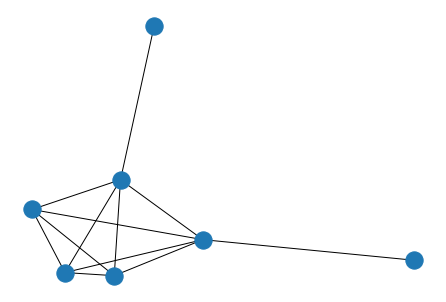

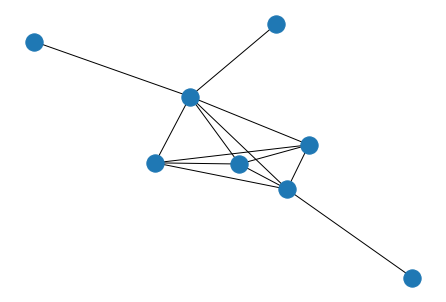

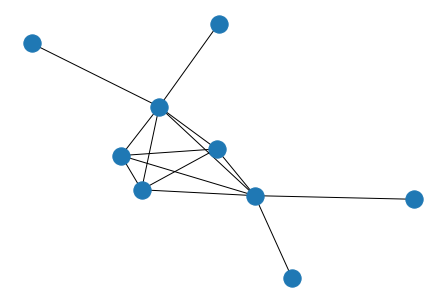

In [5]:
m0=5
run_barabasi(1)

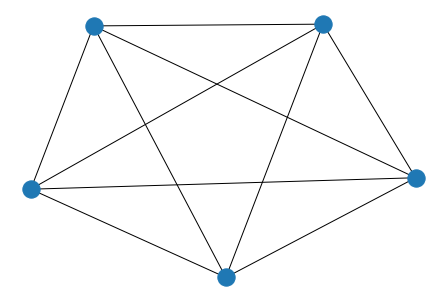

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  from ipykernel import kernelapp as app


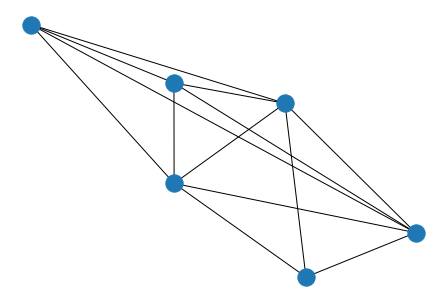

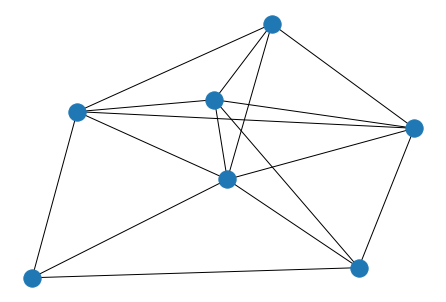

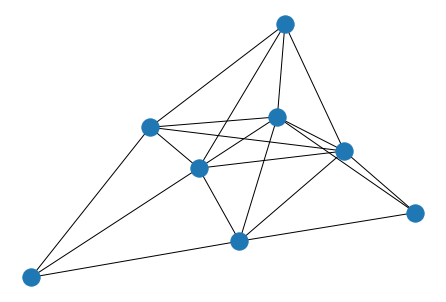

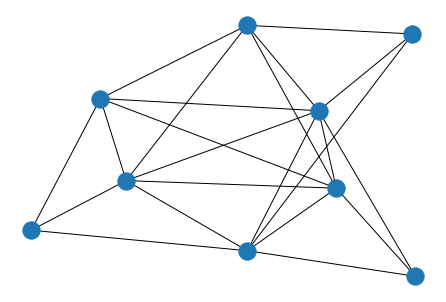

In [6]:
run_barabasi(3)

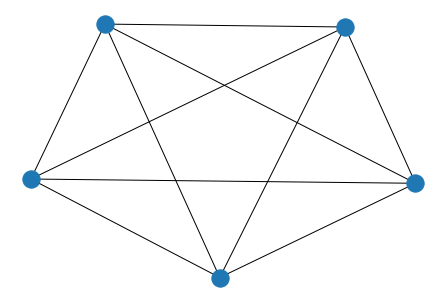

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  from ipykernel import kernelapp as app


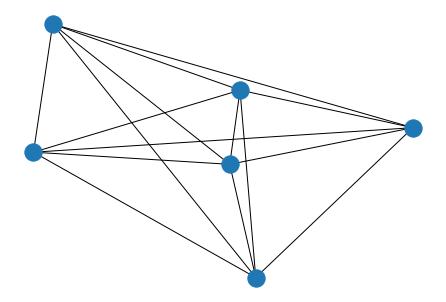

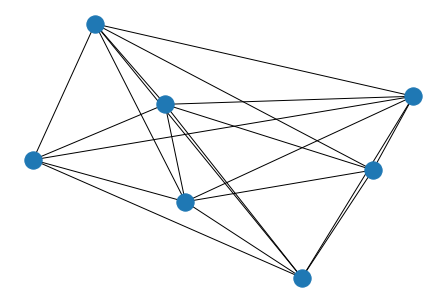

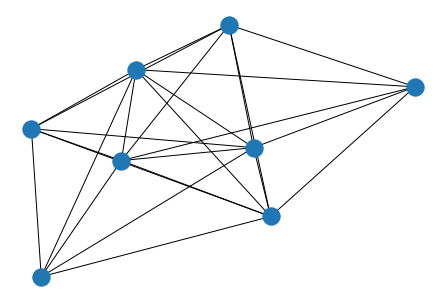

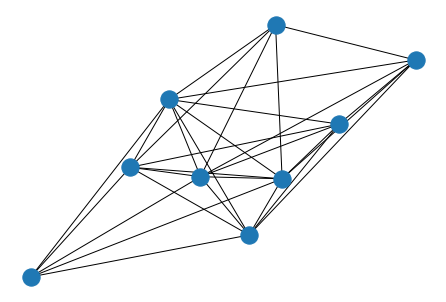

In [7]:
run_barabasi(5)